<a href="https://colab.research.google.com/github/B0544218/thesis/blob/main/SBERT_BookRoll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=09727ba156c3db0c6ae1d1cfa4f4a5ff711dfe44c70c0a349a6b11553a211382
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
import torch
import pandas as pd
df = pd.read_csv('LBLS_seqs.csv')
df = df[df['0']!='empty']
seqs_df = df[['username', 'weeks']]

<ipython-input-3-fa10b4372a5b>:3: DtypeWarning: Columns (139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LBLS_seqs.csv')


In [ ]:
df.shape

(6060, 339)

In [ ]:
seq_start_index = list(df.columns).index('0')

In [ ]:
train_df = df[df.columns[seq_start_index:]]

In [ ]:
# Reading
# Highlight
# Notetaking
# train_df = train_df.replace({"Reading":"Use Reading", "Highlight":"highlight", "Notetaking":"notetake"})   # 打亂
train_df = train_df.replace({"Reading":"Reading", "Highlight":"HL", "Notetaking":"NT"}) # 線錯了但會顯著

In [ ]:
train_df = train_df.replace('empty', '')
train_df = train_df.fillna('')

In [ ]:
seqs_df['seqs'] = train_df.apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)

<ipython-input-9-2c4da05ac896>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seqs_df['seqs'] = train_df.apply(


In [ ]:
dataset = seqs_df['seqs'].to_list()

In [ ]:
dataset[0]

'Reading'

In [ ]:
embeddings = model.encode(dataset)

In [ ]:
import pandas as pd
output = pd.DataFrame(embeddings)

In [ ]:
output.to_csv("BRSBERT_embedding.csv", index=False)

分群

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster, metrics
import os

In [ ]:
input_data = output

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2:
[0 0 0 ... 0 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3:
[2 2 2 ... 0 2 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4:
[1 1 1 ... 2 1 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5:
[2 2 2 ... 3 2 3]


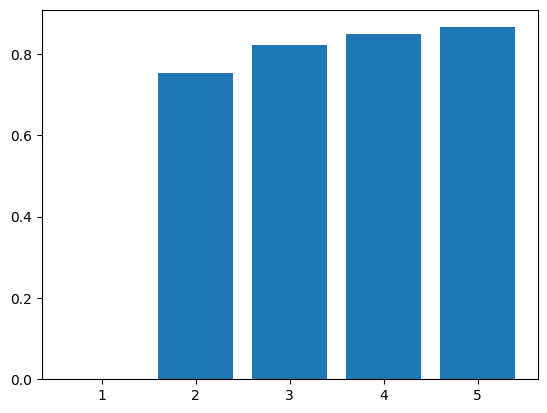

[0, 0.7534652, 0.820785, 0.85006416, 0.86551577]


In [ ]:
# 迴圈
silhouette_avgs = []
x = []
tmp= []
ks = range(2, 6)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(input_data)
    
    cluster_labels = kmeans_fit.labels_
    print(str(k) + ":")
    tmp.append(cluster_labels)
    print(cluster_labels)
    silhouette_avg = metrics.silhouette_score(input_data, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    x.append(k)
# 畫圖(最低值從0開始)
x.insert(0, 1)
silhouette_avgs.insert(0, 0)

plt.bar(x, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [ ]:
silhouette_avgs

[0, 0.7534652, 0.820785, 0.85006416, 0.86551577]

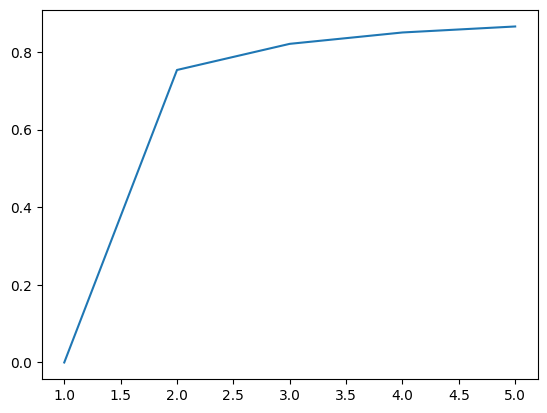

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,silhouette_avgs)

In [ ]:
from collections import Counter
Counter(tmp[0])
# 2211 3849
# 線錯誤
# 3879 2181

Counter({0: 3859, 1: 2201})

In [ ]:
Counter(tmp[1])

Counter({2: 2211, 1: 2201, 0: 1648})

In [ ]:
df['class'] = tmp[0]

In [ ]:
df.to_csv("LCP_cluster_average_2.csv", index=False)

In [ ]:
set(df[df['class']==1]['5'])

{'Highligt', 'Notetaking', 'Reading'}

## 降為

In [ ]:
import pandas as pd

In [ ]:
output=pd.read_csv("BRSBERT_embedding.csv")

In [ ]:
embedding = output

In [ ]:
embedding.shape

(6060, 768)

In [ ]:
embedding['class'] = tmp[1]

In [ ]:
from sklearn import manifold

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 6060 samples in 0.028s...
[t-SNE] Computed neighbors for 6060 samples in 2.255s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6060
[t-SNE] Computed conditional probabilities for sample 2000 / 6060
[t-SNE] Computed conditional probabilities for sample 3000 / 6060
[t-SNE] Computed conditional probabilities for sample 4000 / 6060
[t-SNE] Computed conditional probabilities for sample 5000 / 6060
[t-SNE] Computed conditional probabilities for sample 6000 / 6060
[t-SNE] Computed conditional probabilities for sample 6060 / 6060
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.860752
[t-SNE] KL divergence after 1000 iterations: -0.182866


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

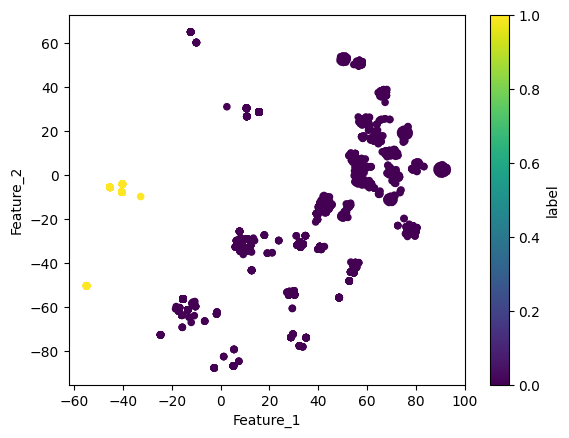

In [ ]:
X_tsne = manifold.TSNE(n_components=2, init='pca', random_state=1, verbose=1, perplexity=45).fit_transform(output.to_numpy())
draw = pd.DataFrame(dict(Feature_1=X_tsne[:,0], Feature_2=X_tsne[:,1], label=tmp[0]))

# draw = pd.DataFrame(dict(Feature_1=X_tsne[:,0], Feature_2=X_tsne[:,1]))
# draw.plot(x="Feature_1", y="Feature_2", kind='scatter', colormap='viridis')
draw.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='viridis')

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 6060 samples in 0.020s...
[t-SNE] Computed neighbors for 6060 samples in 1.988s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6060
[t-SNE] Computed conditional probabilities for sample 2000 / 6060
[t-SNE] Computed conditional probabilities for sample 3000 / 6060
[t-SNE] Computed conditional probabilities for sample 4000 / 6060
[t-SNE] Computed conditional probabilities for sample 5000 / 6060
[t-SNE] Computed conditional probabilities for sample 6000 / 6060
[t-SNE] Computed conditional probabilities for sample 6060 / 6060
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.860752
[t-SNE] KL divergence after 1000 iterations: -0.182866


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

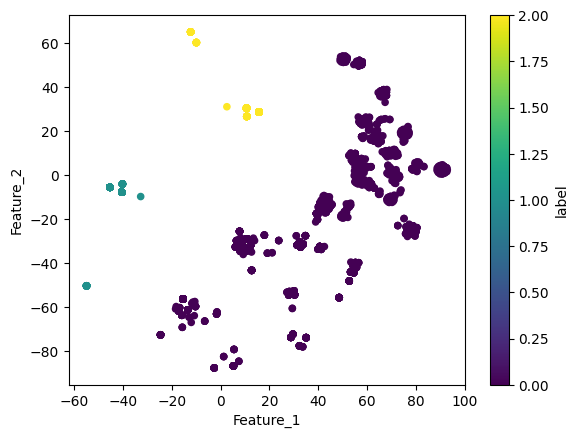

In [ ]:
X_tsne = manifold.TSNE(n_components=2, init='pca', random_state=1, verbose=1, perplexity=45).fit_transform(output.to_numpy())
draw = pd.DataFrame(dict(Feature_1=X_tsne[:,0], Feature_2=X_tsne[:,1], label=tmp[1]))
# draw = pd.DataFrame(dict(Feature_1=X_tsne[:,0], Feature_2=X_tsne[:,1]))
# draw.plot(x="Feature_1", y="Feature_2", kind='scatter', colormap='viridis')
draw.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='viridis')